 МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Зухба Анастасия, a__l@mail.ru

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas
import numpy as np

# Критерии качества моделей

Внутренний критерий оценивает качество на обучении $X^l$, а внешний оценивает качество <<вне обучения>>,
    например, по отложенной  (hold-out) контрольной выборке $X^k$.

In [3]:
from sklearn import metrics

### Метрики качества регрессии

In [4]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale

data = load_boston()

data.data = scale(data.data)

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

In [5]:
from sklearn.linear_model import Ridge

In [6]:
regr = Ridge()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

In [7]:
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred))
print 'MAE:', metrics.mean_absolute_error(y_test, pred)
print 'R2:', metrics.r2_score(y_test, pred)

RMSE: 4.93923741987
MAE: 3.41199513307
R2: 0.712719736375


#### Как распределена ошибка по объектам?

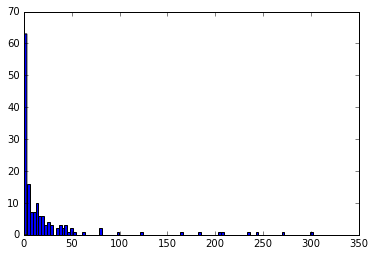

In [8]:
import matplotlib.pyplot as plt

quad_errors = np.power(pred - y_test, 2.0)
plt.hist(quad_errors, bins=100)
plt.show()

In [9]:
idx = np.argmax(quad_errors)
X_test[idx, :]

array([ 0.2417502 , -0.48772236,  1.01599907,  3.66839786,  0.65914726,
        0.56753503,  1.00370066, -1.15911286,  1.66124525,  1.53092646,
        0.80657583,  0.20455072, -1.25077953])

In [10]:
print np.min(metrics.pairwise.euclidean_distances(X_train, X_test[idx]))

1.48580821577


/Users/FlareN/shad-env/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [11]:
# среднее расстояние от тестового объекта до обучающей выборки
print np.min(metrics.pairwise.euclidean_distances(X_train, X_test), axis=0).mean()
print np.min(metrics.pairwise.euclidean_distances(X_train, X_test), axis=0).std()

0.860230925581
0.58313626466


Возможно, в обучающей выборке не было объектов, похожих на данный.

### Метрики качества классификации

THE CARAVAN INSURANCE DATA

http://kdd.ics.uci.edu/databases/tic/tic.html

Задача: предсказать, купит ли человек страховку

In [12]:
data = pandas.read_csv('http://kdd.ics.uci.edu/databases/tic/ticdata2000.txt', sep='\t', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


Данные несбалансированные — мало кто покупает страховку

In [13]:
data.shape

(5822, 86)

In [14]:
data.iloc[:, -1].value_counts()

0    5474
1     348
Name: 85, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(scale(data.iloc[:, 1:-1].astype(np.float)),
                                                    data.iloc[:, -1],
                                                    test_size=0.3)

In [16]:
print 'positive class ration in train:', np.mean(y_train)
print 'positive class ration in test:', np.mean(y_test)

positive class ration in train: 0.0579141104294
positive class ration in test: 0.0641099026903


In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)[:, 1]

In [18]:
print clf.predict_proba(X_test)

[[ 0.97785356  0.02214644]
 [ 0.94994657  0.05005343]
 [ 0.89542048  0.10457952]
 ..., 
 [ 0.93039201  0.06960799]
 [ 0.98692929  0.01307071]
 [ 0.96980851  0.03019149]]


In [19]:
pred_binary = (pred > 0.5).astype(np.int)
print 'Accuracy:', metrics.accuracy_score(y_test, pred_binary)
print 'Accuracy of constant classifier:', metrics.accuracy_score(y_test, np.zeros(y_test.shape))

Accuracy: 0.933600457928
Accuracy of constant classifier: 0.93589009731


In [20]:
print 'Precision:', metrics.precision_score(y_test, pred_binary)
print 'Recall:', metrics.recall_score(y_test, pred_binary)
print 'F1:', metrics.f1_score(y_test, pred_binary)

Precision: 0.0
Recall: 0.0
F1: 0.0


In [21]:
print 'AUC-ROC:', metrics.roc_auc_score(y_test, pred)
print 'AUC-PR:', metrics.average_precision_score(y_test, pred)

AUC-ROC: 0.757598842289
AUC-PR: 0.17055001876


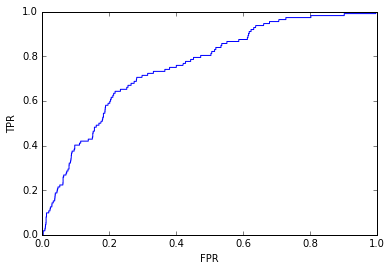

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

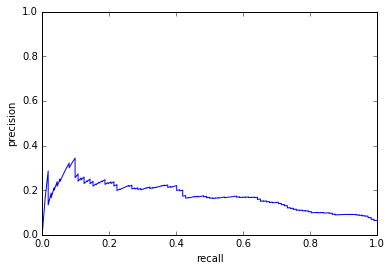

In [23]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pred)
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [24]:
print metrics.classification_report(y_test, pred_binary)

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      1635
          1       0.00      0.00      0.00       112

avg / total       0.88      0.93      0.90      1747



#### Попробуем RandomForest

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)[:, 1]

In [26]:
pred_binary = (pred > 0.5).astype(np.int)
print 'Accuracy:', metrics.accuracy_score(y_test, pred_binary)
print 'Accuracy of constant classifier:', metrics.accuracy_score(y_test, np.zeros(y_test.shape))
print 'Precision:', metrics.precision_score(y_test, pred_binary)
print 'Recall:', metrics.recall_score(y_test, pred_binary)
print 'F1:', metrics.f1_score(y_test, pred_binary)
print 'AUC-ROC:', metrics.roc_auc_score(y_test, pred)
print 'AUC-PR:', metrics.average_precision_score(y_test, pred)

Accuracy: 0.922724670864
Accuracy of constant classifier: 0.93589009731
Precision: 0.151515151515
Recall: 0.0446428571429
F1: 0.0689655172414
AUC-ROC: 0.709927916121
AUC-PR: 0.132542863818


(Random Forest не всегда лучше линейной модели)

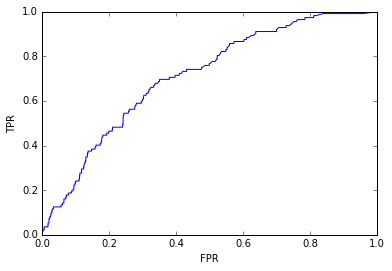

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

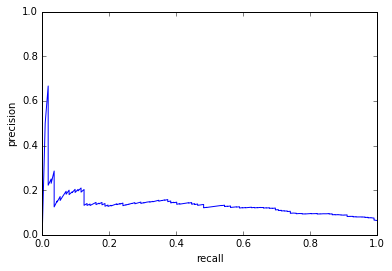

In [28]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pred)
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

### Кросс-валидация

In [29]:
data = load_boston()

data.data = scale(data.data)

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
search_range = np.arange(1, 10)
for k in search_range:
    regr = KNeighborsRegressor(n_neighbors=k, weights='distance')
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)
    print k, metrics.mean_squared_error(y_test, pred)

1 19.2781578947
2 17.9125211299
3 17.1332362445
4 16.7148496948
5 17.8613784011
6 18.100248565
7 18.7488283109
8 19.4128061923
9 19.6483205898


In [32]:
from sklearn.cross_validation import ShuffleSplit, KFold, cross_val_score

In [33]:
cv = ShuffleSplit(X_train.shape[0], n_iter=1, random_state=241, 
                  test_size=0.2)
for k in search_range:
    regr = KNeighborsRegressor(n_neighbors=k, weights='distance')
    print k, -cross_val_score(regr, X_train, y_train, cv=cv, scoring='mean_squared_error')

1 [ 43.68028169]
2 [ 22.97340239]
3 [ 27.31150744]
4 [ 22.1946316]
5 [ 20.82109244]
6 [ 19.74250806]
7 [ 19.67360257]
8 [ 19.56727086]
9 [ 19.91080292]


In [34]:
def do_kfold(k):
    cv = KFold(X_train.shape[0], n_folds=k, random_state=241)
    scores_mean = []
    scores_std = []
    for k in search_range:
        regr = KNeighborsRegressor(n_neighbors=k, weights='distance')
        scores = -cross_val_score(regr, X_train, y_train, cv=cv, 
                                  scoring='mean_squared_error')
        scores_mean.append(scores.mean())
        scores_std.append(scores.std())
        print k, scores.mean(), scores.std(), scores.mean() - scores.std()

    x = search_range
    scores_mean = np.array(scores_mean)
    scores_std = np.array(scores_std)
    plt.plot(x, scores_mean)
    plt.fill_between(x, scores_mean - scores_std, scores_mean + scores_std, alpha=0.5)
    plt.show()

1 33.0191525424 12.8871186441 20.1320338983
2 30.1733415945 14.4122918474 15.7610497471
3 27.4812115805 10.1541623664 17.3270492142
4 24.9904717126 8.33356757941 16.6569041332
5 24.1133913965 6.87765586651 17.23573553
6 23.1885162233 5.99718078168 17.1913354416
7 23.5036346339 5.38967847096 18.113956163
8 22.9928299698 4.65757553905 18.3352544308
9 23.6054328046 4.05830579066 19.5471270139


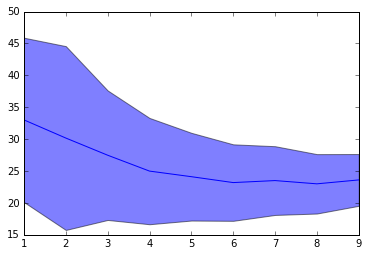

In [35]:
do_kfold(2)

1 23.0580551308 5.40459186993 17.6534632609
2 20.7939635662 6.048895779 14.7450677872
3 21.5780588133 6.38262072243 15.1954380909
4 21.0588092494 6.24066956288 14.8181396865
5 21.5145173761 5.91018051983 15.6043368563
6 21.4265735113 5.49709457285 15.9294789385
7 21.6061847889 5.99087316727 15.6153116217
8 21.2927410572 6.27281500468 15.0199260525
9 21.219669424 6.53777549068 14.6818939333


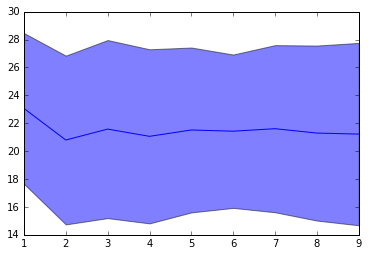

In [36]:
do_kfold(5)

1 22.4199777778 11.1326311265 11.2873466512
2 18.6586692394 11.0152549686 7.64341427081
3 20.4406701436 11.9355353406 8.50513480308
4 20.0440191647 10.6937087765 9.3503103882
5 21.1453913227 10.4326662544 10.7127250683
6 21.0197843444 10.2249513157 10.7948330287
7 21.089601096 11.0030823851 10.086518711
8 20.9872309108 10.8546133023 10.1326176085
9 20.9826329307 11.1565075202 9.82612541051


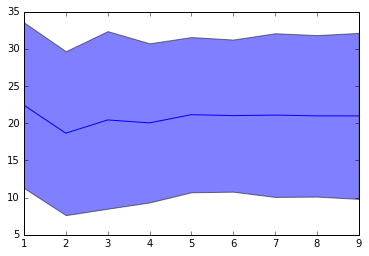

In [37]:
do_kfold(10)

1 21.1344 45.5477049701 -24.4133049701
2 16.2763510016 30.1802553823 -13.9039043807
3 16.2751162489 25.8744475592 -9.59933131036
4 18.300704628 30.6165889586 -12.3158843306
5 18.3071075128 28.3647048463 -10.0575973335
6 19.3620066093 30.1821554778 -10.8201488685
7 19.4597566257 30.3705054754 -10.9107488497
8 19.4487296593 30.5750613789 -11.1263317196
9 19.6268806149 30.7814245604 -11.1545439455


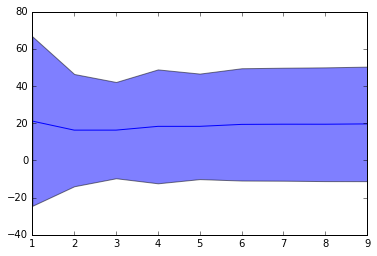

In [38]:
do_kfold(100)

Чем больше фолдов, тем меньше объектов попадает в контроль, тем менее надежно по нему оценивается качество — дисперсия растет

#### Другой датасет

In [39]:
data = pandas.read_csv('http://kdd.ics.uci.edu/databases/tic/ticdata2000.txt', sep='\t', header=None)
X_train, X_test, y_train, y_test = train_test_split(scale(data.iloc[:, 1:-1].astype(np.float)),
                                                    data.iloc[:, -1],
                                                    test_size=0.3)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
search_range = np.arange(5, 71, 5)
for k in search_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    pred = clf.predict_proba(X_test)[:, 1]
    print k, metrics.roc_auc_score(y_test, pred)

5 0.598696685238
10 0.634100379231
15 0.623873425722
20 0.651326724098
25 0.666972938808
30 0.671962053467
35 0.68625052671
40 0.674756542909
45 0.681922725783
50 0.691582002903
55 0.699699190037
60 0.707558874479
65 0.713633597079
70 0.708384053561


In [42]:
from sklearn.cross_validation import StratifiedKFold, StratifiedShuffleSplit

In [43]:
cv = StratifiedShuffleSplit(y_train, n_iter=1, random_state=241, test_size=0.3)
for k in search_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    print k, cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')

5 [ 0.60645027]
10 [ 0.6314592]
15 [ 0.62653961]
20 [ 0.63010125]
25 [ 0.66724836]
30 [ 0.66712329]
35 [ 0.68295414]
40 [ 0.6971888]
45 [ 0.70241215]
50 [ 0.70303752]
55 [ 0.712162]
60 [ 0.7213103]
65 [ 0.72335914]
70 [ 0.72700417]


In [44]:
def do_kfold(k):
    cv = StratifiedKFold(y_train, n_folds=k, random_state=241)
    scores_mean = []
    scores_std = []
    for k in search_range:
        clf = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')
        scores_mean.append(scores.mean())
        scores_std.append(scores.std())
        print k, scores.mean(), scores.std(), scores.mean() - scores.std()

    x = search_range
    scores_mean = np.array(scores_mean)
    scores_std = np.array(scores_std)
    plt.plot(x, scores_mean)
    plt.fill_between(x, scores_mean - scores_std, scores_mean + scores_std, alpha=0.5)
    plt.show()

5 0.590719885046 0.0217925212653 0.56892736378
10 0.630521067518 0.0229706673123 0.607550400205
15 0.658206947833 0.0239369482615 0.634269999572
20 0.653120933909 0.0125546538935 0.640566280015
25 0.66814382711 0.00903112754255 0.659112699568
30 0.667452025319 0.00768444410121 0.659767581218
35 0.666080564441 0.0117510690851 0.654329495356
40 0.669310567103 0.0187584119859 0.650552155117
45 0.671927292874 0.0104754245355 0.661451868339
50 0.678582305815 0.00692412835473 0.67165817746
55 0.683261765923 0.0102403217594 0.673021444164
60 0.684747467736 0.00704126562199 0.677706202114
65 0.685459753288 0.00778351307945 0.677676240209
70 0.68970362477 0.00770858988531 0.681995034884


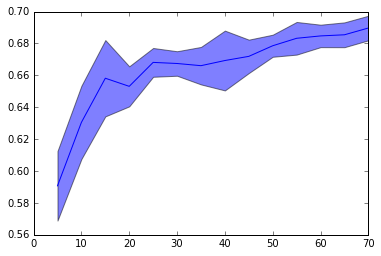

In [45]:
do_kfold(2)

5 0.607885339543 0.0218755754382 0.586009764105
10 0.638529409708 0.0285235282217 0.610005881486
15 0.665106741436 0.0264038130672 0.638702928369
20 0.671302649382 0.030755811425 0.640546837957
25 0.677203661003 0.0284557249407 0.648747936062
30 0.686163332294 0.0272008520083 0.658962480286
35 0.687538549794 0.0364917960477 0.651046753746
40 0.691324257865 0.0271505355904 0.664173722274
45 0.701183930698 0.0300347110594 0.671149219639
50 0.700274302436 0.0323029616037 0.667971340833
55 0.695758203349 0.0308362323614 0.664921970988
60 0.693969481722 0.0322374214117 0.66173206031
65 0.696479760712 0.0348760130371 0.661603747674
70 0.697831526491 0.0358697366516 0.66196178984


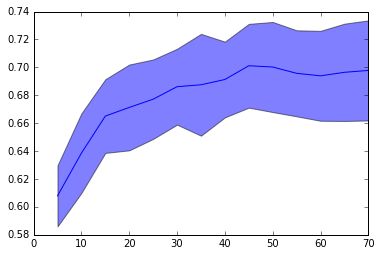

In [46]:
do_kfold(5)

5 0.602198487815 0.0425320125832 0.559666475232
10 0.641632098564 0.0398891035372 0.601742995027
15 0.663121926675 0.0548337512111 0.608288175464
20 0.683314811793 0.0526592820359 0.630655529757
25 0.677973604765 0.0511282889293 0.626845315836
30 0.684798003699 0.0548630686737 0.629934935025
35 0.692830572781 0.0566698089128 0.636160763868
40 0.694685596171 0.0580272424004 0.63665835377
45 0.703767569626 0.0526433744517 0.651124195174
50 0.708092607702 0.0543202266387 0.653772381064
55 0.707107416775 0.0533710469164 0.653736369859
60 0.700678864774 0.0480761133332 0.652602751441
65 0.700706932659 0.0511360322648 0.649570900394
70 0.701674907528 0.0510008248511 0.650674082677


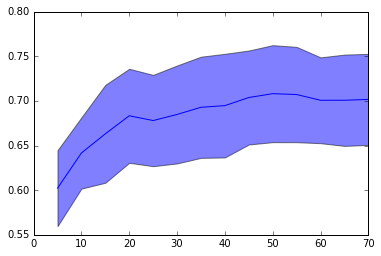

In [47]:
do_kfold(10)

# Отбор признаков

В наших примерах мы будем работать с набором данных, содержащим информацию о случаях сахарного диабета среди индейцев Пима (Pima Indians diabetes). Все признаки являются числовыми, а задача представляет собой двухклассовую классификацию.

### Одномерный отбор признаков

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


В примере ниже используется критерий хи-квадрат (chi-squared test) для неотрицательных признаков, чтобы отобрать 4 лучших признака. Возможно использовать и другие критери. 

In [50]:
# feature extraction

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# summarize scores

print(fit.scores_)


[  111.51969064  1411.88704064    17.60537322    53.10803984  2175.56527292
   127.66934333     5.39268155   181.30368904]


Мы видим оценки для каждого признака и 4 отобранных признака (с наивысшими оценками): plas, test, mass и age.

In [51]:
features = fit.transform(X)

# summarize selected features

print(features[:,:])

[[ 148.     0.    33.6   50. ]
 [  85.     0.    26.6   31. ]
 [ 183.     0.    23.3   32. ]
 ..., 
 [ 121.   112.    26.2   30. ]
 [ 126.     0.    30.1   47. ]
 [  93.     0.    30.4   23. ]]


### Рекурсивное исключение признаков (Del)

In [52]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# load data

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [53]:
# feature extraction

model = LogisticRegression()

rfe = RFE(model, 3)

fit = rfe.fit(X, Y)

print("Num Features: %d") % fit.n_features_

print("Selected Features: %s") % fit.support_

print("Feature Ranking: %s") % fit.ranking_

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


Мы видим, что в результате были отобраны 3 лучших признака: preg, mass, pedi. Отобранные признаки помечены значением «True» в массиве support_ и значением «1» в массиве ranking_.

### Отбор на основе важности признаков

Ансамблевые алгоритмы на основе деревьев решений, такие как случайный лес (random forest), позволяют оценить важность признаков.

In [54]:
from sklearn.ensemble import ExtraTreesClassifier

# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [55]:
# feature extraction

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[ 0.11693595  0.23914711  0.08875792  0.0891933   0.07160288  0.14967823
  0.12376978  0.12091485]


### Метод главных компонент

In [56]:
from sklearn.decomposition import PCA

# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [57]:
# feature extraction

pca = PCA(n_components=3)
fit = pca.fit(X)
features = fit.transform(X)

# summarize components

print("Explained Variance: %s") % fit.explained_variance_ratio_
print(features[:,:])

Explained Variance: [ 0.88854663  0.06159078  0.02579012]
[[-75.71465491  35.95078264  -7.26078895]
 [-82.3582676  -28.90821322  -5.49667139]
 [-74.63064344  67.90649647  19.46180812]
 ..., 
 [ 32.11319827  -3.3766648   -1.58786446]
 [-80.21449431  14.18601977  12.3512639 ]
 [-81.30814972 -21.62149606  -8.15276833]]


### L1-регуляризация

In [58]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X.shape

(768, 8)

In [59]:
lsvc = LinearSVC(C=0.005, penalty="l1", dual=False).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(768, 5)